# Basic RF Model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

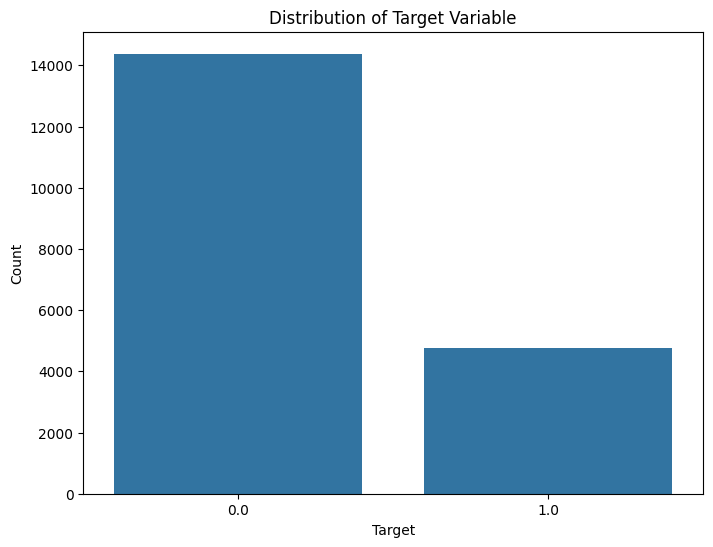

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


data = pd.read_csv(r"C:\Users\annun\Documents\programes\OJT\aug_train.csv")

data.info()

# Basic EDA
# Checking for missing values
missing_values = data.isnull().sum()

# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()



# Display the missing values
missing_values


In [40]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [41]:
(data == '').sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [42]:
# Dropping rows with null values
data.dropna(inplace = True)
data.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [43]:
# for tree based model label encoding will not create any ordinal relationship  compared to linear regression, logistic regression
# we will do label encoding as it will not increasae the dimensions 


# if we want to go with logistic regression, then one hot encoding would be good or {target encoding, hashing, embedding(yet to learn)}

## Encoding

In [44]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)


Categorical columns: Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')


In [46]:
label_encoder = {}

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoder[column] = le
    
  

## resampling - SMOTE

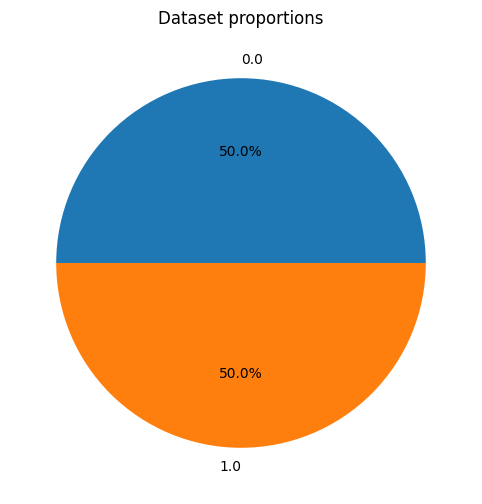

In [76]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X = data.drop(columns = ['target','enrollee_id']) # or data.drop([target','enrollee_id'],axis =1)
y = data.target

X_sm, y_sm = sm.fit_resample(X,y)

label,counts = np.unique(y_sm,return_counts = True)

plt.figure(figsize=(8,6))
plt.pie(counts, autopct='%1.1f%%', labels=label)
plt.title('Dataset proportions')
plt.show()

In [77]:
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)


In [78]:
# Building the Random Forest model on the cleaned data
rf_model_cleaned = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Making predictions
y_pred_cleaned = rf_model_cleaned.predict(X_test_cleaned)


In [80]:
# Evaluating the model
accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_cleaned)
classification_report_output_cleaned = classification_report(y_test_cleaned, y_pred_cleaned)

print(f'Accuracy: {accuracy_cleaned}')
print(f'Classification Report:\n{classification_report_output_cleaned}')

Accuracy: 0.8721980595516895
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88      1555
         1.0       0.85      0.88      0.87      1434

    accuracy                           0.87      2989
   macro avg       0.87      0.87      0.87      2989
weighted avg       0.87      0.87      0.87      2989



In [83]:
y_pred_cleaned = rf_model_cleaned.predict(X_train_cleaned)


Train_accuracy_cleaned = accuracy_score(y_train_cleaned, y_pred_cleaned)

Train_accuracy_cleaned

0.9992471769134254

## resampling ADASYN

In [88]:
from imblearn.over_sampling import ADASYN
# Apply ADASYN

adasyn = ADASYN()
X_res, y_res = adasyn.fit_resample(X, y)

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Building the Random Forest model on the cleaned data
rf_model_cleaned = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Making predictions
y_pred_cleaned = rf_model_cleaned.predict(X_test_cleaned)


In [89]:
# Evaluating the model
accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_cleaned)
classification_report_output_cleaned = classification_report(y_test_cleaned, y_pred_cleaned)

print(f'Accuracy: {accuracy_cleaned}')
print(f'Classification Report:\n{classification_report_output_cleaned}')


y_pred_cleaned = rf_model_cleaned.predict(X_train_cleaned)


Train_accuracy_cleaned = accuracy_score(y_train_cleaned, y_pred_cleaned)

Train_accuracy_cleaned

Accuracy: 0.8709570957095709
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87      1536
         1.0       0.86      0.89      0.87      1494

    accuracy                           0.87      3030
   macro avg       0.87      0.87      0.87      3030
weighted avg       0.87      0.87      0.87      3030



0.9989271271766939

## simple oversampling

In [90]:
from imblearn.over_sampling import RandomOverSampler


oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Building the Random Forest model on the cleaned data
rf_model_cleaned = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Making predictions
y_pred_cleaned = rf_model_cleaned.predict(X_test_cleaned)


In [91]:
# Evaluating the model
accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_cleaned)
classification_report_output_cleaned = classification_report(y_test_cleaned, y_pred_cleaned)

print(f'Accuracy: {accuracy_cleaned}')
print(f'Classification Report:\n{classification_report_output_cleaned}')


y_pred_cleaned = rf_model_cleaned.predict(X_train_cleaned)


Train_accuracy_cleaned = accuracy_score(y_train_cleaned, y_pred_cleaned)

Train_accuracy_cleaned

Accuracy: 0.9531615925058547
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95      1555
         1.0       0.92      0.99      0.95      1434

    accuracy                           0.95      2989
   macro avg       0.95      0.95      0.95      2989
weighted avg       0.96      0.95      0.95      2989



0.9994144709326641

## simple undersampling


In [93]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler()
X_resampled, y_resampled = undersampler.fit_resample(X, y)

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Building the Random Forest model on the cleaned data
rf_model_cleaned = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Making predictions
y_pred_cleaned = rf_model_cleaned.predict(X_test_cleaned)


In [94]:
# Evaluating the model
accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_cleaned)
classification_report_output_cleaned = classification_report(y_test_cleaned, y_pred_cleaned)

print(f'Accuracy: {accuracy_cleaned}')
print(f'Classification Report:\n{classification_report_output_cleaned}')


y_pred_cleaned = rf_model_cleaned.predict(X_train_cleaned)


Train_accuracy_cleaned = accuracy_score(y_train_cleaned, y_pred_cleaned)

Train_accuracy_cleaned

Accuracy: 0.7104377104377104
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.78      0.74       311
         1.0       0.72      0.64      0.68       283

    accuracy                           0.71       594
   macro avg       0.71      0.71      0.71       594
weighted avg       0.71      0.71      0.71       594



0.9991568296795953

# logistic model

In [115]:
data_log = pd.read_csv(r"C:\Users\annun\Documents\programes\OJT\aug_train.csv")


## encoding one hot encoding 

In [116]:
import pandas as pd

# Perform one-hot encoding using pandas get_dummies()
encoded_data = pd.get_dummies(data_log, columns=['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'] )


## undersampling 

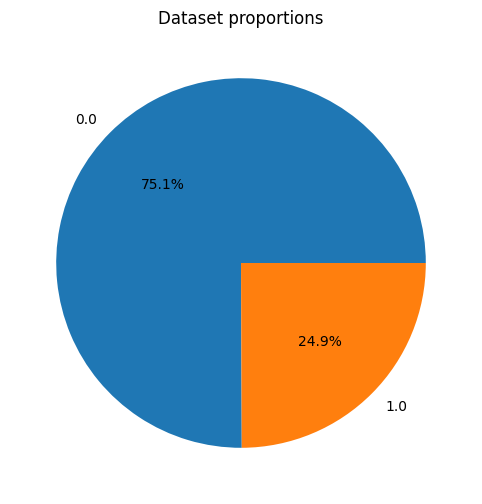

In [117]:
label,counts = np.unique(encoded_data['target'],return_counts = True)

plt.figure(figsize=(8,6))
plt.pie(counts, autopct='%1.1f%%', labels=label)
plt.title('Dataset proportions')
plt.show()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler()
X_resampled, y_resampled = undersampler.fit_resample(encoded_data.drop(['target','enrollee_id'],axis =1), encoded_data['target'])

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_cleaned,y_train_cleaned)
lr_test_pred = lr_model.predict(X_test_cleaned)
lr_train_pred = lr_model.predict(X_train_cleaned)

lr_test_accuracy =  accuracy_score(y_test_cleaned,lr_test_pred)

lr_train_accuracy = accuracy_score(y_train_cleaned,lr_train_pred)

print(f"Logistic Regression Train Accuracy: {lr_train_accuracy}, Logistic Regression Test Accuracy : {lr_test_accuracy}")

print(classification_report(y_test_cleaned, lr_test_pred))


Logistic Regression Train Accuracy: 0.7158516020236088, Logistic Regression Test Accuracy : 0.7239057239057239
              precision    recall  f1-score   support

         0.0       0.72      0.77      0.75       311
         1.0       0.73      0.67      0.70       283

    accuracy                           0.72       594
   macro avg       0.72      0.72      0.72       594
weighted avg       0.72      0.72      0.72       594



# Text Classification

In [32]:
# Fill NaN values with 'none' before creating the 'pred_text' column
import pandas as pd

data = pd.read_csv(r"C:\Users\annun\Documents\programes\OJT\aug_train.csv")

data_filled = data.fillna('none')

In [33]:
data_filled['pred_text'] = data_filled.apply(
    lambda row: (
        f"city is {row['city']} "
        f"city_development_index_{row['city_development_index']} "
        f"gender_{row['gender']} "
        f"{row['relevent_experience']} "
        f"enrolled_university_{row['enrolled_university']} "
        f"education_level_{row['education_level']} "
        f"major_discipline_{row['major_discipline']} "
        f"experience_{row['experience']}_years "
        f"company_size_{row['company_size']} "
        f"company_type_{row['company_type']} "
        f"last_new_job_{row['last_new_job']}_years_ago "
        f"training_hours_{row['training_hours']}_hours"
    ),
    axis=1
)

# Selecting the relevant columns for the new dataframe
data_text_filled_correct = data_filled[['enrollee_id', 'pred_text', 'target']]

In [34]:
data_text_filled_correct['pred_text'][0]

'city is city_103 city_development_index_0.92 gender_Male Has relevent experience enrolled_university_no_enrollment education_level_Graduate major_discipline_STEM experience_>20_years company_size_none company_type_none last_new_job_1_years_ago training_hours_36_hours'

In [35]:
data_filled

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,pred_text
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,none,none,1,36,1.0,city is city_103 city_development_index_0.92 g...
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,city is city_40 city_development_index_0.77599...
2,11561,city_21,0.624,none,No relevent experience,Full time course,Graduate,STEM,5,none,none,never,83,0.0,city is city_21 city_development_index_0.624 g...
3,33241,city_115,0.789,none,No relevent experience,none,Graduate,Business Degree,<1,none,Pvt Ltd,never,52,1.0,city is city_115 city_development_index_0.789 ...
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,city is city_162 city_development_index_0.767 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,none,none,1,42,1.0,city is city_173 city_development_index_0.878 ...
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,none,none,4,52,1.0,city is city_103 city_development_index_0.92 g...
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,city is city_103 city_development_index_0.92 g...
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,none,<1,500-999,Pvt Ltd,2,97,0.0,city is city_65 city_development_index_0.802 g...


In [36]:
data_text_filled_correct

,enrollee_id,pred_text,target
0,8949,city is city_103 city_development_index_0.92 g...,1.0
1,29725,city is city_40 city_development_index_0.77599...,0.0
2,11561,city is city_21 city_development_index_0.624 g...,0.0
3,33241,city is city_115 city_development_index_0.789 ...,1.0
4,666,city is city_162 city_development_index_0.767 ...,0.0
...,...,...,...
19153,7386,city is city_173 city_development_index_0.878 ...,1.0
19154,31398,city is city_103 city_development_index_0.92 g...,1.0
19155,24576,city is city_103 city_development_index_0.92 g...,0.0
19156,5756,city is city_65 city_development_index_0.802 g...,0.0


In [37]:
data_text_filled_correct.isnull().sum()

4479999999999999 	

4479999999999999

In [41]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
#nltk.download('punkt')

import spacy
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords
import re
import contractions

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

#Function to expand contractions using the 'contractions' library
def expand_contractions(text):
    return contractions.fix(text)

# Function to clean text
def clean_text(text):
    #text = re.sub(r'https?://\S+', '', text)  # Remove hyperlinks
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    #text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters and numbers
    return text

# Function to lemmatize text
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

def preprocessing(data, text_col):
    # Convert to lowercase
    data[text_col + '_lowcase'] = data[text_col].str.lower()
    
    #Expand contractions
    data[text_col + '_expanded'] = data[text_col + '_lowcase'].apply(expand_contractions)
    
    # Clean text
    data[text_col + '_cleaned'] = data[text_col + '_expanded'].apply(clean_text)
    
    # Tokenize words and remove stopwords
    data[text_col + '_word_tokens'] = data[text_col + '_cleaned'].apply(word_tokenize)
    data[text_col + '_without_stopwords'] = data[text_col + '_word_tokens'].apply(lambda x: [t for t in x if t not in spacy_stopwords])
    
    # Join tokens back to string
    data[text_col + '_Final_text'] = data[text_col + '_without_stopwords'].apply(lambda x: ' '.join(x))
    
    # Lemmatize text
    data[text_col + '_Final_text'] = data[text_col + '_Final_text'].apply(lemmatize_text)
    
    return data


preprocessing(data_text_filled_correct, 'pred_text')
data_text_filled_correct.head()



C:\Users\annun\AppData\Local\Temp\ipykernel_14036\2159213738.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[text_col + '_lowcase'] = data[text_col].str.lower()
C:\Users\annun\AppData\Local\Temp\ipykernel_14036\2159213738.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[text_col + '_expanded'] = data[text_col + '_lowcase'].apply(expand_contractions)
C:\Users\annun\AppData\Local\Temp\ipykernel_14036\2159213738.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,enrollee_id,pred_text,target,pred_text_lowcase,pred_text_expanded,pred_text_cleaned,pred_text_word_tokens,pred_text_without_stopwords,pred_text_Final_text
0,8949,city is city_103 city_development_index_0.92 g...,1.0,city is city_103 city_development_index_0.92 g...,city is city_103 city_development_index_0.92 g...,city is city_103 city_development_index_092 ge...,"[city, is, city_103, city_development_index_09...","[city, city_103, city_development_index_092, g...",city city_103 city_development_index_092 gende...
1,29725,city is city_40 city_development_index_0.77599...,0.0,city is city_40 city_development_index_0.77599...,city is city_40 city_development_index_0.77599...,city is city_40 city_development_index_0775999...,"[city, is, city_40, city_development_index_077...","[city, city_40, city_development_index_0775999...",city city_40 city_development_index_0775999999...
2,11561,city is city_21 city_development_index_0.624 g...,0.0,city is city_21 city_development_index_0.624 g...,city is city_21 city_development_index_0.624 g...,city is city_21 city_development_index_0624 ge...,"[city, is, city_21, city_development_index_062...","[city, city_21, city_development_index_0624, g...",city city_21 city_development_index_0624 gende...
3,33241,city is city_115 city_development_index_0.789 ...,1.0,city is city_115 city_development_index_0.789 ...,city is city_115 city_development_index_0.789 ...,city is city_115 city_development_index_0789 g...,"[city, is, city_115, city_development_index_07...","[city, city_115, city_development_index_0789, ...",city city_115 city_development_index_0789 gend...
4,666,city is city_162 city_development_index_0.767 ...,0.0,city is city_162 city_development_index_0.767 ...,city is city_162 city_development_index_0.767 ...,city is city_162 city_development_index_0767 g...,"[city, is, city_162, city_development_index_07...","[city, city_162, city_development_index_0767, ...",city city_162 city_development_index_0767 gend...


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

## Using TF-IDF Vectorizer to generate embeddings

In [43]:

tfidf_vectorizer_correct = TfidfVectorizer(max_features=1000)
tfidf_embeddings_correct = tfidf_vectorizer_correct.fit_transform(data_text_filled_correct['pred_text_Final_text'])

In [44]:
# Converting embeddings to a DataFrame
tfidf_embeddings_df_correct = pd.DataFrame(tfidf_embeddings_correct.toarray())

### SMOTE (oversampling)

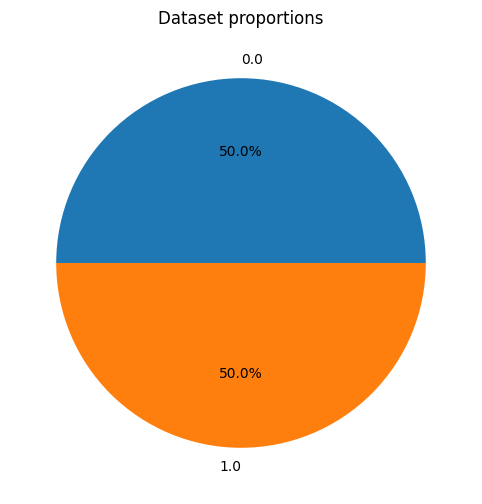

In [48]:
# Adding target column to embeddings DataFrame
import numpy as np
import matplotlib.pyplot as plt 
tfidf_embeddings_df_correct['target'] = data_text_filled_correct['target'].values

# Splitting the data into training and testing sets
X_correct = tfidf_embeddings_df_correct.drop(columns=['target'])
y_correct = tfidf_embeddings_df_correct['target']

from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_sm, y_sm = sm.fit_resample(X_correct,y_correct)

label,counts = np.unique(y_sm,return_counts = True)

plt.figure(figsize=(8,6))
plt.pie(counts, autopct='%1.1f%%', labels=label)
plt.title('Dataset proportions')
plt.show()

In [49]:
X_train_correct, X_test_correct, y_train_correct, y_test_correct = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Building a Random Forest model using the TF-IDF embeddings
rf_model_tfidf_correct = RandomForestClassifier(n_estimators=70, random_state=42)
rf_model_tfidf_correct.fit(X_train_correct, y_train_correct)

# Making predictions
y_pred_tfidf_correct = rf_model_tfidf_correct.predict(X_test_correct)

# Evaluating the model
accuracy_tfidf_correct = accuracy_score(y_test_correct, y_pred_tfidf_correct)
classification_report_output_tfidf_correct = classification_report(y_test_correct, y_pred_tfidf_correct)


rf_model_tfidf_correct_train_pred = rf_model_tfidf_correct.predict(X_train_correct)
rf_model_tfidf_correct_train_accuracy = accuracy_score(y_train_correct,rf_model_tfidf_correct_train_pred)
print(f'Accuracy: {accuracy_tfidf_correct}, train accuracy = {rf_model_tfidf_correct_train_accuracy}')


print(f'Classification Report:\n{classification_report_output_tfidf_correct}')

Accuracy: 0.8539892230140796, train accuracy = 0.9990003911512886
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      2877
         1.0       0.85      0.85      0.85      2876

    accuracy                           0.85      5753
   macro avg       0.85      0.85      0.85      5753
weighted avg       0.85      0.85      0.85      5753



In [50]:
# logistic regression 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_correct,y_train_correct)
lr_test_pred = lr_model.predict(X_test_correct)
lr_train_pred = lr_model.predict(X_train_correct)

lr_test_accuracy =  accuracy_score(y_test_correct,lr_test_pred)

lr_train_accuracy = accuracy_score(y_train_correct,lr_train_pred)

print(f"Logistic Regression Train Accuracy: {lr_train_accuracy}, Logistic Regression Test Accuracy : {lr_test_accuracy}")

print(classification_report(y_test_correct, lr_test_pred))


Logistic Regression Train Accuracy: 0.7899952192620279, Logistic Regression Test Accuracy : 0.7802885451069007
              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78      2877
         1.0       0.78      0.78      0.78      2876

    accuracy                           0.78      5753
   macro avg       0.78      0.78      0.78      5753
weighted avg       0.78      0.78      0.78      5753



In [51]:
# gradient boosting 
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=100)
gbc_model.fit(X_train_correct,y_train_correct)

gbc_pred = gbc_model.predict(X_test_correct)
gbc_pred_train  = gbc_model.predict(X_train_correct)


gbc_accuracy = accuracy_score(y_test_correct, gbc_pred)

gbc_accuracy_train  = accuracy_score(y_train_correct,gbc_pred_train)

print(f"Support Vector Classifier Accuracy: {gbc_accuracy}, train accuracy : {gbc_accuracy_train}")
print(classification_report(y_test_correct, gbc_pred))



Support Vector Classifier Accuracy: 0.8258300017382235, train accuracy : 0.823243078795254
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82      2877
         1.0       0.82      0.83      0.83      2876

    accuracy                           0.83      5753
   macro avg       0.83      0.83      0.83      5753
weighted avg       0.83      0.83      0.83      5753



### Tomek links ( undersampling)


In [52]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_resampled, y_resampled = tl.fit_resample(X_correct,y_correct)


X_train_correct, X_test_correct, y_train_correct, y_test_correct = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [53]:


# Building a Random Forest model using the TF-IDF embeddings
rf_model_tfidf_correct = RandomForestClassifier(n_estimators=70, random_state=42)
rf_model_tfidf_correct.fit(X_train_correct, y_train_correct)

# Making predictions
y_pred_tfidf_correct = rf_model_tfidf_correct.predict(X_test_correct)

# Evaluating the model
accuracy_tfidf_correct = accuracy_score(y_test_correct, y_pred_tfidf_correct)
classification_report_output_tfidf_correct = classification_report(y_test_correct, y_pred_tfidf_correct)


rf_model_tfidf_correct_train_pred = rf_model_tfidf_correct.predict(X_train_correct)
rf_model_tfidf_correct_train_accuracy = accuracy_score(y_train_correct,rf_model_tfidf_correct_train_pred)
print(f'Accuracy: {accuracy_tfidf_correct}, train accuracy = {rf_model_tfidf_correct_train_accuracy}')


print(f'Classification Report:\n{classification_report_output_tfidf_correct}')

Accuracy: 0.80554777248529, train accuracy = 0.9980386662930792
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      2638
         1.0       0.66      0.53      0.59       931

    accuracy                           0.81      3569
   macro avg       0.75      0.72      0.73      3569
weighted avg       0.80      0.81      0.80      3569



In [54]:
# logistic regression 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_correct,y_train_correct)
lr_test_pred = lr_model.predict(X_test_correct)
lr_train_pred = lr_model.predict(X_train_correct)

lr_test_accuracy =  accuracy_score(y_test_correct,lr_test_pred)

lr_train_accuracy = accuracy_score(y_train_correct,lr_train_pred)

print(f"Logistic Regression Train Accuracy: {lr_train_accuracy}, Logistic Regression Test Accuracy : {lr_test_accuracy}")

print(classification_report(y_test_correct, lr_test_pred))


Logistic Regression Train Accuracy: 0.813673297842533, Logistic Regression Test Accuracy : 0.8021854861305688
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      2638
         1.0       0.66      0.50      0.57       931

    accuracy                           0.80      3569
   macro avg       0.75      0.70      0.72      3569
weighted avg       0.79      0.80      0.79      3569



In [55]:
# gradient boosting 
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=100)
gbc_model.fit(X_train_correct,y_train_correct)

gbc_pred = gbc_model.predict(X_test_correct)
gbc_pred_train  = gbc_model.predict(X_train_correct)


gbc_accuracy = accuracy_score(y_test_correct, gbc_pred)

gbc_accuracy_train  = accuracy_score(y_train_correct,gbc_pred_train)

print(f"Support Vector Classifier Accuracy: {gbc_accuracy}, train accuracy : {gbc_accuracy_train}")
print(classification_report(y_test_correct, gbc_pred))



Support Vector Classifier Accuracy: 0.8005043429532082, train accuracy : 0.808279630148501
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      2638
         1.0       0.66      0.50      0.56       931

    accuracy                           0.80      3569
   macro avg       0.75      0.70      0.72      3569
weighted avg       0.79      0.80      0.79      3569



## frequency DTM (bag of words)


In [56]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the CountVectorizer instance
vectorizer = CountVectorizer()#min_df =10)

# Fit and transform the preprocessed documents
dtm = vectorizer.fit_transform(data_text_filled_correct['pred_text_Final_text'])

# Get feature names (terms)
terms = vectorizer.get_feature_names_out()

# Create the DataFrame
dtm_df = pd.DataFrame(dtm.toarray(), columns=terms)


# Display the DataFrame
dtm_df

,city,city_1,city_10,city_100,city_101,city_102,city_103,city_104,city_105,city_106,...,training_hours_92_hour,training_hours_94_hour,training_hours_95_hour,training_hours_96_hour,training_hours_97_hour,training_hours_97_hours,training_hours_98_hour,training_hours_99_hour,training_hours_9_hour,training_hours_9_hours
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19154,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19155,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19156,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [57]:

from sklearn.model_selection import train_test_split

X = dtm_df

y = data['target']




### SMOTE

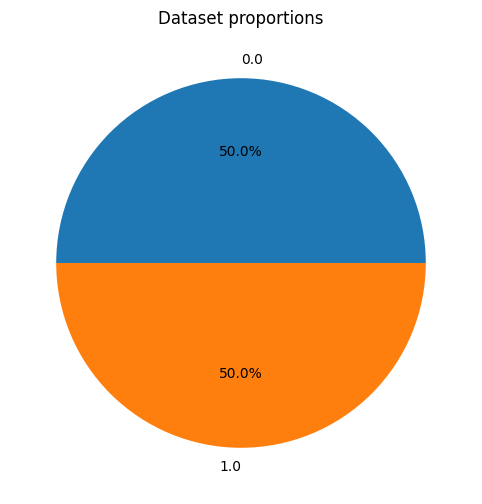

In [65]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_sm, y_sm = sm.fit_resample(X,y)

label,counts = np.unique(y_sm,return_counts = True)

plt.figure(figsize=(8,6))
plt.pie(counts, autopct='%1.1f%%', labels=label)
plt.title('Dataset proportions')
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2 , random_state=42)

In [66]:
from sklearn.naive_bayes import MultinomialNB
senti_model = MultinomialNB()
senti_model.fit(X_train, y_train)

MultinomialNB()

In [67]:
print("Train Accuracy", senti_model.score(X_train,y_train))
print("Test Accuracy", senti_model.score(X_test,y_test))

Train Accuracy 0.7832152635925073
Test Accuracy 0.7797670780462368


In [68]:
from sklearn.metrics import accuracy_score, classification_report
senti_pred = senti_model.predict(X_test)
print(classification_report(y_test, senti_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78      2877
         1.0       0.78      0.78      0.78      2876

    accuracy                           0.78      5753
   macro avg       0.78      0.78      0.78      5753
weighted avg       0.78      0.78      0.78      5753



## TFIDF bigrams

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the CountVectorizer instance
vectorizer = TfidfVectorizer(ngram_range = (2,2), min_df  = 10)

# Fit and transform the preprocessed documents
dtm = vectorizer.fit_transform(data_text_filled_correct['pred_text_Final_text'])

# Get feature names (terms)
terms = vectorizer.get_feature_names_out()

# Create the DataFrame
dtm_df = pd.DataFrame(dtm.toarray(), columns=terms)


# Display the DataFrame
dtm_df.head()

,city city_1,city city_10,city city_100,city city_101,city city_102,city city_103,city city_104,city city_105,city city_11,city city_114,...,sector last_new_job_never_years_ago,sector last_new_job_none_years_ago,stage startup,startup last_new_job_1_years_ago,startup last_new_job_2_years_ago,startup last_new_job_3_years_ago,startup last_new_job_4_years_ago,startup last_new_job_never_years_ago,startup last_new_job_none_years_ago,time course
0,0.0,0.0,0.0,0.0,0.0,0.225408,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.17048
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.323176,0.0,0.0,0.00000


In [84]:

from sklearn.model_selection import train_test_split

X = dtm_df

y = data['target']


### ADASYN

In [85]:
from imblearn.over_sampling import ADASYN
# Apply ADASYN

adasyn = ADASYN()
X_res, y_res = adasyn.fit_resample(X, y)

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_res, y_res, test_size=0.2, random_state=42)



In [81]:
# random forest

# Building the Random Forest model on the cleaned data
rf_model_cleaned = RandomForestClassifier(n_estimators=100, max_depth= 10, random_state=42)
rf_model_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Making predictions
y_pred_cleaned = rf_model_cleaned.predict(X_test_cleaned)




# Evaluating the model
accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_cleaned)
classification_report_output_cleaned = classification_report(y_test_cleaned, y_pred_cleaned)

print(f'Accuracy: {accuracy_cleaned}')
print(f'Classification Report:\n{classification_report_output_cleaned}')


y_pred_cleaned = rf_model_cleaned.predict(X_train_cleaned)


Train_accuracy_cleaned = accuracy_score(y_train_cleaned, y_pred_cleaned)

Train_accuracy_cleaned

Accuracy: 0.8046875
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81      2882
         1.0       0.82      0.79      0.80      2878

    accuracy                           0.80      5760
   macro avg       0.81      0.80      0.80      5760
weighted avg       0.81      0.80      0.80      5760



0.8018143148574157

In [87]:
# logistic regression 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_cleaned,y_train_cleaned)
lr_test_pred = lr_model.predict(X_test_cleaned)
lr_train_pred = lr_model.predict(X_train_cleaned)

lr_test_accuracy =  accuracy_score(y_test_cleaned,lr_test_pred)

lr_train_accuracy = accuracy_score(y_train_cleaned,lr_train_pred)

print(f"Logistic Regression Train Accuracy: {lr_train_accuracy}, Logistic Regression Test Accuracy : {lr_test_accuracy}")

print(classification_report(y_test_cleaned, lr_test_pred))


Logistic Regression Train Accuracy: 0.7637050219193542, Logistic Regression Test Accuracy : 0.7640625
              precision    recall  f1-score   support

         0.0       0.76      0.77      0.77      2882
         1.0       0.77      0.76      0.76      2878

    accuracy                           0.76      5760
   macro avg       0.76      0.76      0.76      5760
weighted avg       0.76      0.76      0.76      5760

